In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import time

from src.model import *

In [3]:
SPECTRA_DIR = 'Bruker_Alpha_KBr/*' #FT-IR

AFSIS_PATH = Path('afsis/2009-2013/Dry_Chemistry/ICRAF/')

spectra_df = load_spectra_df(SPECTRA_DIR, AFSIS_PATH)

In [8]:
wet_chem_df = pd.read_csv('afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv')
wet_chem_df.head()

,SSN,Public,EC,ExAc,ExBas,M3 Al,M3 B,M3 Ca,M3 Cu,M3 Fe,M3 K,M3 Mg,M3 Mn,M3 Na,M3 P,M3 S,M3 Zn,PH,PSI
0,icr006475,True,0.053,2.56,2.744241,1095.0,0.3337,207.1,1.3150,153.70,306.30,89.5,9.266,42.71,4.495,18.960,2.825,4.682,67.052495
1,icr006586,True,0.193,0.59,16.797753,1165.0,0.7899,1665.0,2.8140,126.80,1186.00,636.7,254.700,40.83,12.510,13.600,1.952,7.062,30.420552
2,icr007929,True,0.305,0.19,16.503619,727.6,0.6142,2518.0,0.2496,260.40,72.57,428.5,35.820,42.94,21.090,14.810,2.742,7.114,60.506163
3,icr008008,True,0.053,0.48,6.302775,1458.0,0.3603,734.3,1.3690,134.10,274.60,222.5,29.110,20.73,109.200,11.400,0.980,5.650,51.470143
4,icr010198,True,0.032,1.05,2.390303,2166.0,0.0100,261.8,1.6860,97.49,91.76,76.5,375.200,49.31,3.958,5.281,1.258,5.501,247.626533


In [4]:
wet_chem_df.columns

Index(['RES ID', 'SSN', 'pH', '%N', '%C', 'C % Inorg  ', 'C % Org',
       'Am Ox_Al mg/kg', 'Am Ox-Fe mg/kg', 'AmOx-Mn/mg/kg', 'AmOx-Pmg/kg',
       ' Olsen P mg/kg', 'pbi no units', 'Caex cmolc/ kg soil',
       'Kex cmolc/ kg soil', 'Mgex cmolc/ kg soil', 'Naex cmolc/ kg soil',
       'ECEC cmolc/ kg soil', 'ICP OES Al mg/kg ', 'ICP OES Ca mg/kg ',
       'ICP OES Co mg/kg ', 'ICP OES Cr mg/kg ', 'ICP OES Cu mg/kg ',
       'ICP OES Fe mg/kg ', 'ICP OES K mg/kg ', 'ICP OES Mg mg/kg ',
       'ICP OES Mn mg/kg ', 'ICP OES Na mg/kg ', 'ICP OES Ni mg/kg ',
       'ICP OES P mg/kg ', 'ICP OES Pb mg/kg ', 'ICP OES S mg/kg ',
       'ICP OES Zn mg/kg ', 'ICPMS As 75 mg/kg', 'ICP MS Se 78 mg/kg',
       'ICP MS Mo 95 mg/kg', 'ICP MS Cd 114 mg/kg'],
      dtype='object')

In [11]:
WET_CHEM_PATH = 'afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv'
elements = ['EC', 'M3 Ca', 'M3 K', 'M3 Mg', 'M3 P', 'PH' ]
columns_to_load = elements + ['SSN']


wet_chem_df = pd.read_csv(WET_CHEM_PATH, index_col='SSN', usecols=columns_to_load)

In [12]:
data_df = spectra_df.merge(wet_chem_df, left_index=True, right_index=True)


In [13]:
contains_nan = data_df.isnull().values.sum()
contains_nan

0

In [14]:
data_df = data_df.dropna()

In [15]:
data_df

,3998.360,3996.944,3995.528,3994.111,3992.695,3991.278,3989.862,3988.446,3987.029,3985.613,...,403.660,402.244,400.827,399.411,EC,M3 Ca,M3 K,M3 Mg,M3 P,PH
icr049735,0.857259,0.857547,0.857735,0.857855,0.857935,0.858004,0.858099,0.858272,0.858574,0.859021,...,1.583792,1.582283,1.582876,1.586669,3.120,1100.00,1440.000,2250.000,20.100,5.280
icr033851,0.888819,0.889785,0.890634,0.891345,0.891952,0.892517,0.893096,0.893711,0.894345,0.894955,...,2.071036,2.088854,2.108267,2.124043,0.381,4898.32,1311.000,1068.000,3.200,7.867
icr068419,0.737544,0.737696,0.737825,0.737997,0.738270,0.738679,0.739225,0.739875,0.740569,0.741240,...,1.877494,1.873794,1.861494,1.841964,0.072,589.00,54.500,60.200,7.590,5.490
icr010078,0.866204,0.866464,0.866515,0.866454,0.866412,0.866498,0.866757,0.867155,0.867606,0.868016,...,2.196409,2.181209,2.161997,2.141904,0.034,466.20,71.800,106.500,11.180,5.642
icr075696,0.762460,0.762595,0.762422,0.762029,0.761554,0.761152,0.760956,0.761036,0.761384,0.761910,...,2.109414,2.066387,2.015429,1.963986,0.037,389.00,60.800,46.300,5.670,6.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
icr049317,0.759126,0.759662,0.760279,0.760964,0.761704,0.762466,0.763192,0.763816,0.764292,0.764613,...,2.168434,2.122934,2.079116,2.042253,0.053,392.00,49.000,73.700,7.710,6.500
icr030368,0.665729,0.665815,0.666078,0.666488,0.666999,0.667565,0.668155,0.668748,0.669321,0.669845,...,2.136325,2.122001,2.108800,2.099970,0.165,33130.00,55.360,558.000,0.554,8.516
icr033545,0.846042,0.846653,0.847440,0.848327,0.849258,0.850209,0.851169,0.852118,0.853006,0.853760,...,2.030173,2.039201,2.045445,2.045152,0.281,10888.30,1239.000,607.000,11.523,8.544
icr075607,0.662185,0.662449,0.662661,0.662759,0.662690,0.662438,0.662034,0.661556,0.661105,0.660777,...,1.855772,1.850045,1.838264,1.821862,0.056,324.00,78.400,60.800,55.000,6.230


In [16]:
y = data_df[elements]
y

,EC,M3 Ca,M3 K,M3 Mg,M3 P,PH
icr049735,3.120,1100.00,1440.000,2250.000,20.100,5.280
icr033851,0.381,4898.32,1311.000,1068.000,3.200,7.867
icr068419,0.072,589.00,54.500,60.200,7.590,5.490
icr010078,0.034,466.20,71.800,106.500,11.180,5.642
icr075696,0.037,389.00,60.800,46.300,5.670,6.430
...,...,...,...,...,...,...
icr049317,0.053,392.00,49.000,73.700,7.710,6.500
icr030368,0.165,33130.00,55.360,558.000,0.554,8.516
icr033545,0.281,10888.30,1239.000,607.000,11.523,8.544
icr075607,0.056,324.00,78.400,60.800,55.000,6.230


In [18]:
X = pd.DataFrame.drop(data_df, columns=elements)
X_columns = X.columns
X

,3998.360,3996.944,3995.528,3994.111,3992.695,3991.278,3989.862,3988.446,3987.029,3985.613,...,412.158,410.742,409.326,407.909,406.493,405.077,403.660,402.244,400.827,399.411
icr049735,0.857259,0.857547,0.857735,0.857855,0.857935,0.858004,0.858099,0.858272,0.858574,0.859021,...,1.586752,1.588667,1.589647,1.589535,1.588279,1.586141,1.583792,1.582283,1.582876,1.586669
icr033851,0.888819,0.889785,0.890634,0.891345,0.891952,0.892517,0.893096,0.893711,0.894345,0.894955,...,2.008968,2.020820,2.030369,2.038455,2.046698,2.057045,2.071036,2.088854,2.108267,2.124043
icr068419,0.737544,0.737696,0.737825,0.737997,0.738270,0.738679,0.739225,0.739875,0.740569,0.741240,...,1.801972,1.815624,1.831298,1.847582,1.862350,1.873107,1.877494,1.873794,1.861494,1.841964
icr010078,0.866204,0.866464,0.866515,0.866454,0.866412,0.866498,0.866757,0.867155,0.867606,0.868016,...,2.250531,2.236817,2.228227,2.221840,2.215346,2.207334,2.196409,2.181209,2.161997,2.141904
icr075696,0.762460,0.762595,0.762422,0.762029,0.761554,0.761152,0.760956,0.761036,0.761384,0.761910,...,2.155347,2.168228,2.174212,2.172217,2.161511,2.141052,2.109414,2.066387,2.015429,1.963986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
icr049317,0.759126,0.759662,0.760279,0.760964,0.761704,0.762466,0.763192,0.763816,0.764292,0.764613,...,2.217000,2.242633,2.257347,2.257167,2.240665,2.209612,2.168434,2.122934,2.079116,2.042253
icr030368,0.665729,0.665815,0.666078,0.666488,0.666999,0.667565,0.668155,0.668748,0.669321,0.669845,...,2.132059,2.144573,2.153797,2.158050,2.156320,2.148617,2.136325,2.122001,2.108800,2.099970
icr033545,0.846042,0.846653,0.847440,0.848327,0.849258,0.850209,0.851169,0.852118,0.853006,0.853760,...,2.011883,2.012099,2.011190,2.011602,2.014915,2.021413,2.030173,2.039201,2.045445,2.045152
icr075607,0.662185,0.662449,0.662661,0.662759,0.662690,0.662438,0.662034,0.661556,0.661105,0.660777,...,1.791361,1.811056,1.827747,1.840986,1.850443,1.855628,1.855772,1.850045,1.838264,1.821862


In [19]:
%%time
y = np.log1p(y)

CPU times: user 932 µs, sys: 73 µs, total: 1 ms
Wall time: 568 µs


In [20]:
X = np.apply_along_axis(np.gradient, 1, X)

In [21]:
%%time
X_train, X_validate, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

CPU times: user 5.13 ms, sys: 12.2 ms, total: 17.3 ms
Wall time: 28.8 ms


In [25]:
columns = elements

In [26]:
column_vals = []
for val in X_columns:
    column_vals.append(float(val))

Training model for EC.
1262 samples available.
CV r^2 score: 0.150
EC RMSE percentage = 1.6660403419874745


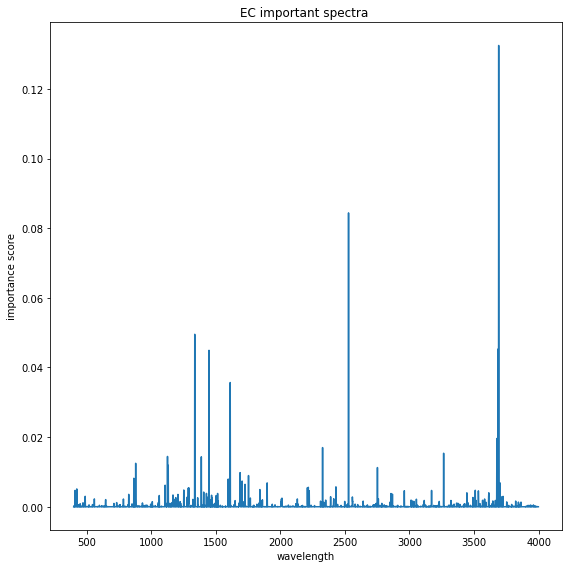

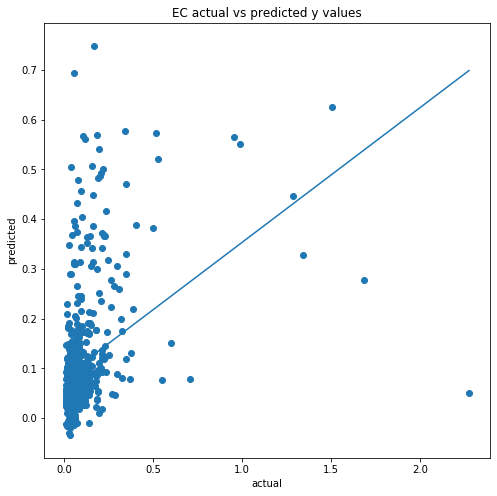

Training model for M3 Ca.
1262 samples available.
CV r^2 score: 0.760
M3 Ca RMSE percentage = 0.09194255859978183


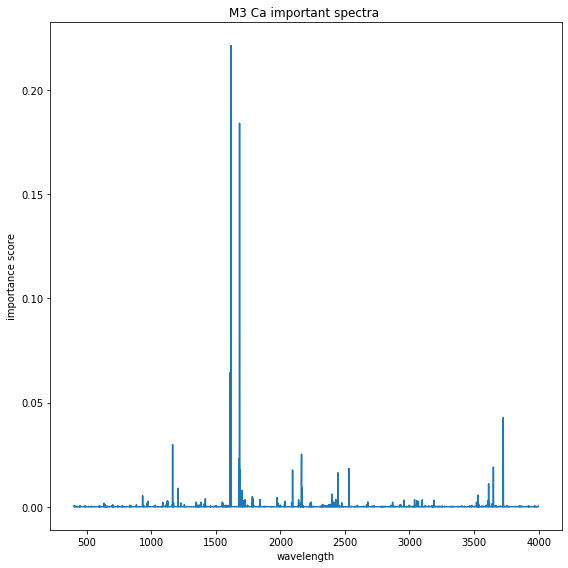

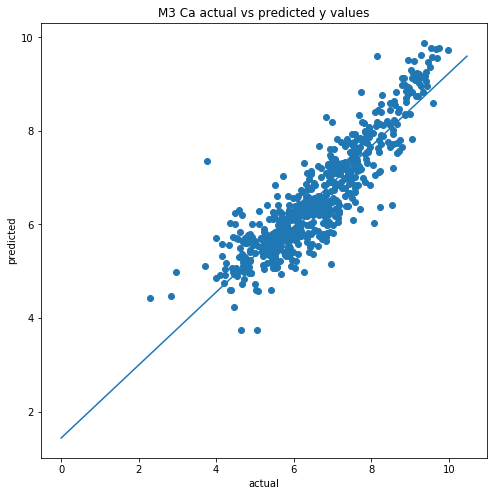

Training model for M3 K.
1262 samples available.
CV r^2 score: 0.514
M3 K RMSE percentage = 0.14731024755154096


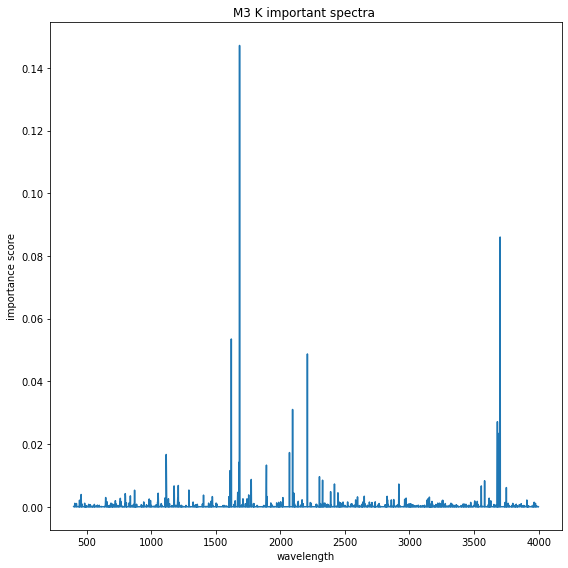

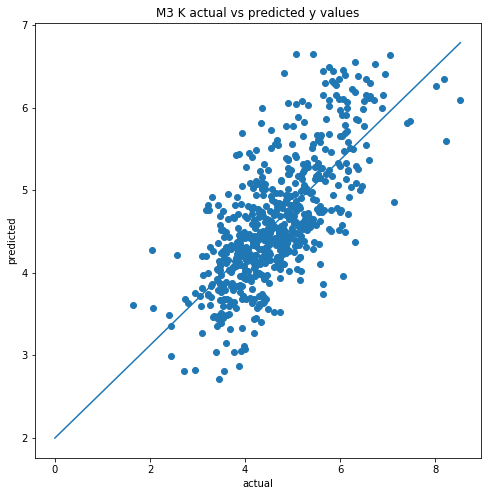

Training model for M3 Mg.
1262 samples available.
CV r^2 score: 0.725
M3 Mg RMSE percentage = 0.0983824594659615


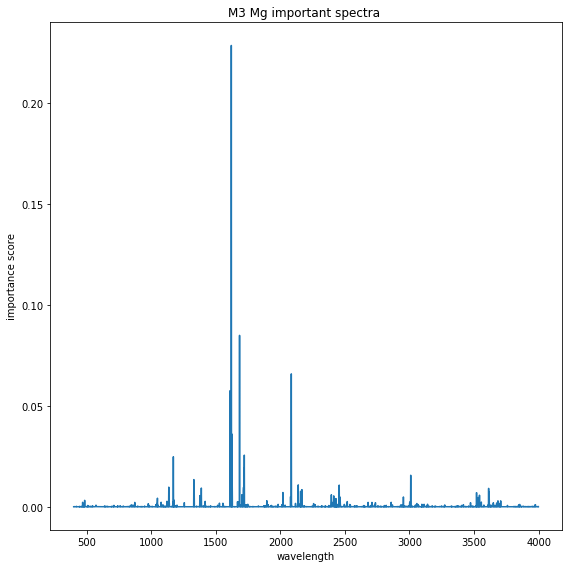

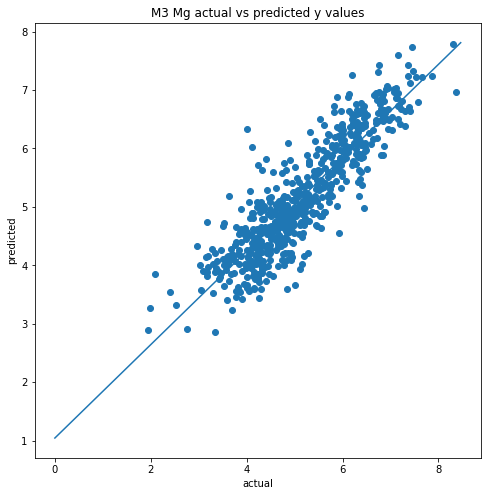

Training model for M3 P.
1262 samples available.
CV r^2 score: 0.196
M3 P RMSE percentage = 0.4466514735301987


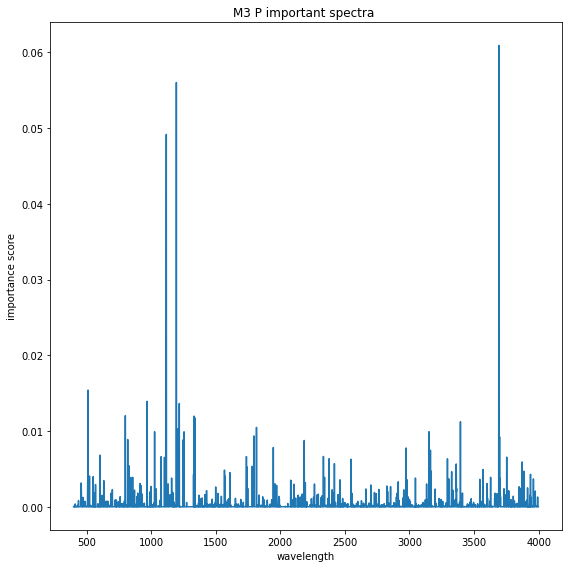

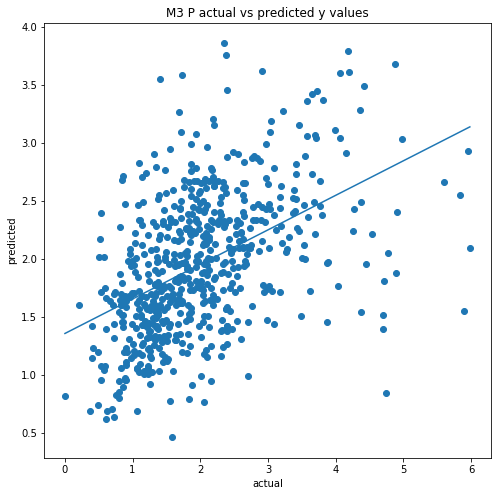

Training model for PH.
1262 samples available.
CV r^2 score: 0.676
PH RMSE percentage = 0.04172086797164779


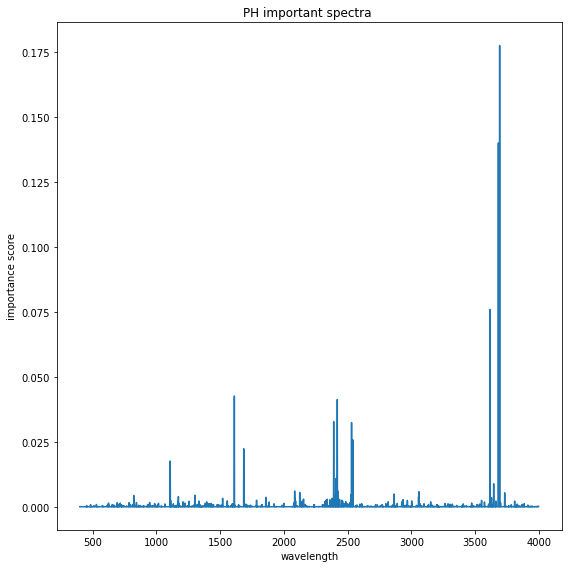

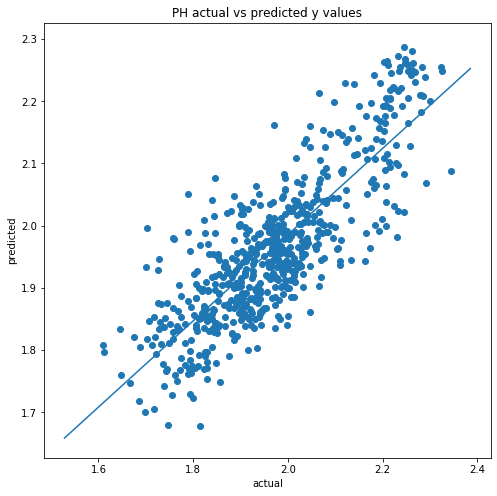

CPU times: user 50min 43s, sys: 691 ms, total: 50min 44s
Wall time: 50min 44s


In [27]:
%%time
models = []
for target in columns:
    #set the target value of interest
    Y_COLUMN = target
    
    #initialize the vanilla xgboost model
    model, r_squared = basic_xgboost3(X_train, y_train[Y_COLUMN])
    
    #fit and predict it for the target variable
    model.fit(X_train, y_train[Y_COLUMN])
    yhat = model.predict(X_validate)
    
    #evaluate results with root mean square error percentage
    rmse = np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))
    _mean = y[Y_COLUMN].mean()
    rmsep = rmse / _mean
    print(f'{Y_COLUMN} RMSE percentage = {rmsep}')
    
    #plot the feature importance
    feature_importance = model.feature_importances_
    
    fig, ax = plt.subplots(figsize=(8,8))
    plt.plot(column_vals, feature_importance)
    #plt.xticks(feature_importance, , rotation='vertical')
    plt.xlabel('wavelength')
    plt.ylabel('importance score')
    plt.title(f'{Y_COLUMN} important spectra ')
    plt.tight_layout()
    plt.show()
    
    #plot the predicted to true
    fig, ax = plt.subplots(figsize=(8,8))
    plt.scatter(y_test[Y_COLUMN], yhat)
    plt.title(f'{Y_COLUMN} actual vs predicted y values')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    
    #plot r squared
    plt.plot(np.unique(y[Y_COLUMN]), np.poly1d(np.polyfit(y_test[Y_COLUMN], yhat, 1))(np.unique(y[Y_COLUMN])))
    plt.show()
    